(app:charge-on-ring)=
# Electric Potential by Charge on a Ring

A charge $Q$ is uniformly distributed on a ring of radius $R$.  The ring lies on the $xy$ plane and the center of the ring is the located at the origin of the coordinates.  The electric potential at the position $\mathbf{r}$ can be computed up to the following integral:

$$
V(r,\theta,\phi) = \frac{Q}{4\pi \epsilon_0} \frac{1}{2\pi} \int_0^{2\pi} \frac{d \chi}{\sqrt{r^2+R^2 - 2 r R \sin\theta \cos\chi}}
$$(eq:potential-by-ring-charge1)

where the spherical coordinates $(r,\theta,\phi)$ is used.  No one seems able to calculate the integral analytically.  The integral is not improper except for $r=R$ and $\theta=\pi/2$ (right on the ring).  It looks easy to integrate it numerically as long as the measurement point is not too close to the ring.  The charge $Q$ and the radius $R$ are the parameters. We can get rid of them by introducing $V_0 = \displaystyle\frac{Q}{4 \pi \epsilon_0 R}$ and $s = \displaystyle\frac{r}{R}$.  Equation {eq:potential-by-ring-charge1} can be written as

$$
\frac{V}{V_0} = \frac{1}{2\pi} \int_0^{2\pi} \frac{d \chi}{\sqrt{s^2+1 - 2 s \sin\theta \cos\chi}}
$$(eq:potential-by-ring-charge2)

By measuring the potential with $V_0$ as unit, the equation has no dimension and does not explicitly depend on $Q$ nor $R$.  

It is easy to see that when $s \gg 1$, the right hand side of Eq. {eq}`eq:potential-by-ring-charge2` is approximately $1/s$, which is the Coulomb potential generated by a point charge of $Q$ located at the center of the ring.  If you look at the ring from far away, it looks like a particle of charge $Q$.  This asymptotic behavior can be used to check the validity of the numerical results. 

We look at the potential along the $x$ axis.  Due to cylindrical symmetry, the potential is exactly the same along any radial line on the $xy$ plane.  

potential along the x axis


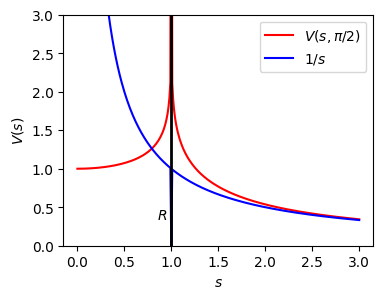

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

NX=301
NZ=301
x=np.linspace(0,3,NX)
f=np.zeros(NX)
g=np.zeros(NX)

# infinity is replaced with this value for plotting purpose
vmax = 10.0

NI=501
chi=np.linspace(0,2*np.pi,NI)

def V(s,theta):
    f=1./np.sqrt(s**2+1-2*s*np.sin(theta)*np.cos(chi))/(2*np.pi)
    return simpson(f,x=chi)

# potential along the x axis
for i in range(NX):
    theta = np.pi/2
    if x[i] != 1.0: #  avoid the ring
        s = x[i]
        f[i]=V(s,theta)
        if s != 0.0:
            g[i]=1/s
        else:
            g[i]=vmax
    else:
        f[i]=vmax

print("potential along the x axis")
plt.figure(figsize=(4,3))        
plt.plot(x,f,"-r",label=r"$V(s,\pi/2)$")
plt.plot(x,g,"-b",label=r"$1/s$")
plt.xlabel(r"$s$")
plt.ylabel(r"$V(s)$")
plt.legend(loc=1)
plt.ylim(0,3)
plt.axvline(x = 1.0, color = 'k', linestyle = '-', linewidth=2)
plt.text(0.85,0.35,r"$R$")
plt.show()

The vertical line shows the location of the ring where the potential diverges.  The potential decays as $s$ goes to the infinity.  At the center of the ring, the potential is 1. The blue line indicates the potential generated by the same amount of charge placed at the center of the ring.  As the Gauss's law predicts, the two potentials coincide as $s$ increases.

Next, we plot the potential on the $xz$ plane using contour plot.

Contour plot of the potential field on xz plane.


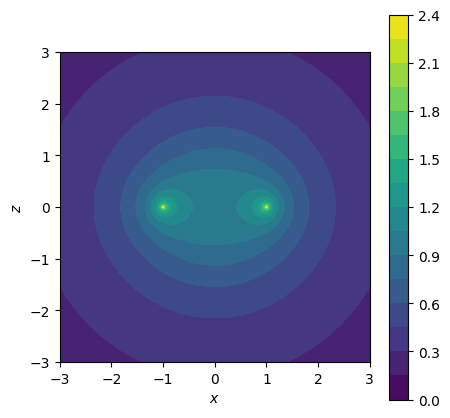

In [2]:
# continued from the previous code cell
# contour plot on the xz plane

NX=401
NZ=401
x=np.linspace(-3,3,NX)
z=np.linspace(-3,3,NZ)
f=np.zeros([NZ,NX])

for j in range(1,NZ):
    for i in range(NX):
        if (x[i] == 1.0) or (x[i] == -1.0):
            # potential diverges on the ring
            f[j,i]=vmax
        else:
            s = np.sqrt(x[i]**2+z[j]**2)
            if s==0:
                # theta is not defined at the coordinate origin
                # any value is ok.
                theta=np.pi
            else:
                theta = np.pi/2 - np.arctan(abs(z[j])/s)
                
            f[j,i]=V(s,theta)

print("Contour plot of the potential field on xz plane.")
plt.figure(figsize=(5,5))
plt.contourf(x,z,f,20)
plt.gca().set_aspect('equal')
plt.xlabel(r"$x$")
plt.ylabel(r"$z$")
plt.colorbar()
plt.show()

High potential is clearly seen at the ring the location of ring, (1,0) and (-1,0).  As $s$ increases, the constant potential surface becomes spherical.  The potential at a point far from the ring  looks like the Coulomb potential $1/s$.

Do you need to plot for a real case with an actual value of $Q$ and $R$?   You don't have to recalculate the integral.  We just need to scale the output.  Let us plot the potential again with $Q=2.5\, C$ and $R=0.1\, m$.  In the SI units, $\epsilon_0 = 8.8541878128 \times 10^{-12}$.   The distance and potential are scaled back to the SI units by multiplying $V_0$ and $R$, respectively.  You see the same image except for the tick labels of coordinates and colarmap.  

Contour plot of the potential field on xz plane.


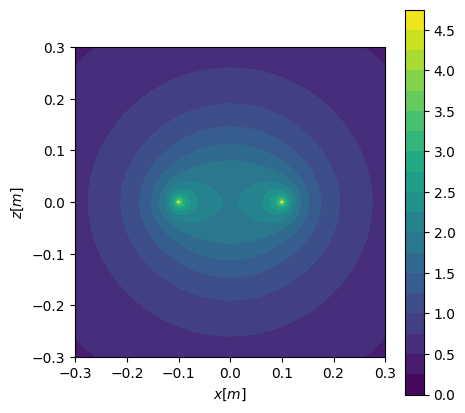

In [3]:
# continued from the previous code cell

# set the parameter values
e0=8.8541878128e-12
R=0.1
Q=2.5
V0=Q/(4*np.pi*R)

# scale the coordinates and potential
X=x*R
Z=z*R
F=f*V0

# plot it again
print("Contour plot of the potential field on xz plane.")
plt.figure(figsize=(5,5))
plt.contourf(X,Z,F,20)
plt.gca().set_aspect('equal')
plt.xlabel(r"$x [m]$")
plt.ylabel(r"$z [m]$")
plt.colorbar()
plt.show()

___

Updated on 4/25/2024 by R. Kawai